In [1]:
tweets = open("trump_tweets.csv")


In [2]:
tweets


<open file 'trump_tweets.csv', mode 'r' at 0x11201dae0>

In [3]:
tweets = [tweet.strip() for tweet in tweets][1:]

In [4]:
tweets[0]

"763398630812311552,Morning Joe's weakness is its low ratings. I don't watch anymore but I heard he went wild against Rudy Giuliani and #2A - sad &amp; irrelevant!,Twitter for iPhone"

In [5]:
import spacy

In [6]:
# need python -m spacy.en.download
nlp = spacy.load('en')

In [7]:
doc = nlp(unicode(tweets[0]))

In [8]:
doc

763398630812311552,Morning Joe's weakness is its low ratings. I don't watch anymore but I heard he went wild against Rudy Giuliani and #2A - sad &amp; irrelevant!,Twitter for iPhone

In [9]:
myents = []

In [10]:
docs = [nlp(unicode(tweet, errors='ignore')) for tweet in tweets]

In [11]:
for doc in docs:
    myents += doc.ents

In [12]:
from collections import Counter

In [13]:
Counter(map(lambda x: str(x), myents)).most_common()

[('Android', 308),
 ('Trump', 89),
 ('Twitter', 72),
 ('Hillary', 57),
 ('tonight', 49),
 ('Crooked Hillary', 48),
 ('today', 45),
 ('America', 41),
 ('Trump2016', 40),
 ('tomorrow', 35),
 ('Ted Cruz', 33),
 ('Ohio', 32),
 ('Twitter Web Client', 29),
 ('Clinton', 28),
 ('Pennsylvania', 28),
 ('New York', 28),
 ('Indiana', 27),
 ('Marco Rubio', 27),
 ('Bernie', 26),
 ('Florida', 26),
 ('Obama', 26),
 ('Republican', 25),
 ('Crooked Hillary Clinton', 25),
 ('Hillary Clinton', 24),
 ('U.S.', 24),
 ('ISIS', 20),
 ('American', 20),
 ('Rubio', 18),
 ('Cruz', 17),
 ('Bernie Sanders', 17),
 ('GOP', 17),
 ('two', 17),
 ('Wisconsin', 17),
 ('Kasich', 17),
 ('last night', 16),
 ('California', 16),
 ('yesterday', 16),
 ('Arizona', 15),
 ('one', 15),
 ('millions', 15),
 ('Donald Trump', 14),
 ('Texas', 14),
 ('the Republican Party', 13),
 ('Twitter for Android', 13),
 ('Melania', 13),
 ('CNN', 13),
 ('Democrats', 13),
 ('Virginia', 13),
 ('Lyin', 12),
 ('Tuesday', 11),
 ('Colorado', 11),
 ('Dems', 1

In [14]:
obama = open("stemmed-speeches/stemmed-obama-speeches/2005.04.23.txt").read()

In [15]:
obama = obama.replace('\\n', '').replace('__NUM__', '').split('__PUNCT__')

In [16]:
word = doc[2]

In [17]:
trump = [" ".join([d.lemma_ for d in doc]) for doc in docs]

In [18]:
nsamples = min(len(obama), len(trump))

In [19]:
obama, trump = obama[:nsamples], trump[:nsamples]

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
all_data = obama + trump

In [22]:
vectorizer = CountVectorizer(min_df=5, stop_words='english')

In [23]:
X = vectorizer.fit_transform(all_data)

In [24]:
X # This is aweosme sentence vectors

<360x83 sparse matrix of type '<type 'numpy.int64'>'
	with 971 stored elements in Compressed Sparse Row format>

In [25]:
y = [0] * nsamples + [1] * nsamples

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20)

In [28]:
from sklearn.svm import SVC

In [29]:
clf = SVC(kernel='linear')

In [30]:
clf.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
clf.score(X_test, y_test)

1.0

In [32]:
clf.score(X_train, y_train)

0.95588235294117652

In [33]:
X_test[0]

<1x83 sparse matrix of type '<type 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [34]:
i_to_w = {v: k for k, v in vectorizer.vocabulary_.items()}

In [35]:
ws = [i_to_w[i] for i in xrange(len(i_to_w))]

In [36]:
coefs = clf.coef_.toarray()[0]

In [37]:
coefs_to_words = sorted(zip(coefs, ws))[-100:]

In [38]:
print coefs_to_words

[(-1.0, u'work'), (-0.3017806663787479, u'economi'), (-0.3017806663787479, u'thi'), (-0.23202745494867558, u'america'), (-0.23202745494867558, u'ethanol'), (-0.23202745494867558, u'fuel'), (-0.15449930391310482, u'ar'), (-0.15449930391310482, u'price'), (-0.12813280605549898, u'famili'), (-0.11374270882317306, u'job'), (-0.11264375752250122, u'know'), (-0.11241279077605955, u'farm'), (-0.00035838959654113656, u'ask'), (-0.00021673542453412142, u'colleg'), (-0.00021673542453412142, u'middl'), (-0.0001903732161084434, u'illinoi'), (-0.0001903732161084434, u'southern'), (-0.00018290232627462231, u'look'), (-0.00018139109625512706, u'research'), (-0.00015622034039153299, u'great'), (-9.7775317875858914e-05, u'need'), (-9.7099628357494305e-05, u'washington'), (-9.4950334415801804e-05, u'agricultur'), (-1.342812129040416e-05, u'year'), (0.0, u'answer'), (0.0, u'bad'), (0.0, u'client'), (0.0, u'convention'), (0.0, u'countri'), (0.0, u'dai'), (0.0, u'e85'), (0.0, u'grow'), (0.0, u'ha'), (0.0, 

In [39]:
import matplotlib.pyplot as plt

/Users/thomas.allen/mc/envs/tc/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [40]:
import numpy as np

In [41]:
_, plot = plt.subplots()

In [42]:
plot.scatter(coefs, np.zeros_like(np.arange(len(ws))))

In [43]:
for i, w in enumerate(ws):
    plot.annotate(w, (coefs[i], i))

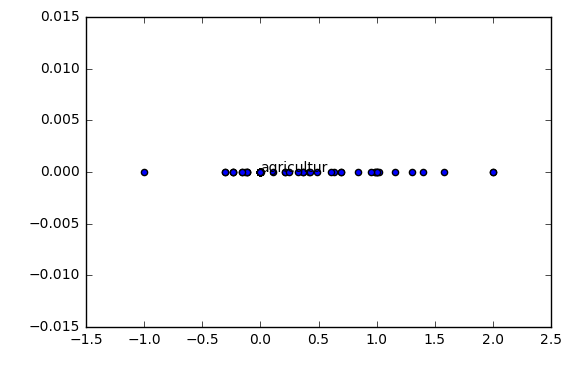

In [44]:
plt.show()